<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021<br>
<h3>Implement and Time Selection Sort Algorithm</h3><br>

In [1]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import time
import timeit
from time import perf_counter, perf_counter_ns
from random import shuffle
from random import seed
from random import random
import matplotlib.pyplot as plt
#import matplotlib.style as style
import seaborn as sns
%matplotlib inline

sns.set_style('white')


<h2>Sort Algorithm</h2>

In [2]:
# Finds the smallest value in an array. Code taken from Grokking Algorithms book
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

In [3]:
# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

print(selectionSort([5, 3, 6, 2, 10]))

[2, 3, 5, 6, 10]


<h2>Time Tracking Function</h2>

In [4]:
#A time tracking function

def elapsed(func):
    time_start = perf_counter_ns()
    func()
    time_stop = perf_counter_ns()
    return ((time_stop - time_start) / 1000000) #convert from ns to ms

<h2>Create and Sort Data</h2>

In [5]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Array Length', 'Elapsed Time (ms)'])

In [6]:
for i in range(1,6):
    #Create arrays per size requirements
    array_size = 5000*(i) 
    
    
    arrx = []  #initialize new array 
    arrx = list(np.unique(np.random.uniform(1,1000, array_size))) #this will ensure no duplicates, but sorts data
    shuffle(arrx) #unsort data so we can sort later
    
    sort_time = elapsed(lambda: selectionSort(arrx))
    
    results.loc[i] = [array_size, sort_time]
                    

<h1>Results</h1>

In [7]:
results

,Array Length,Elapsed Time (ms)
1,5000.0,664.9282
2,10000.0,2646.4801
3,15000.0,5990.1842
4,20000.0,11058.3412
5,25000.0,17259.6518


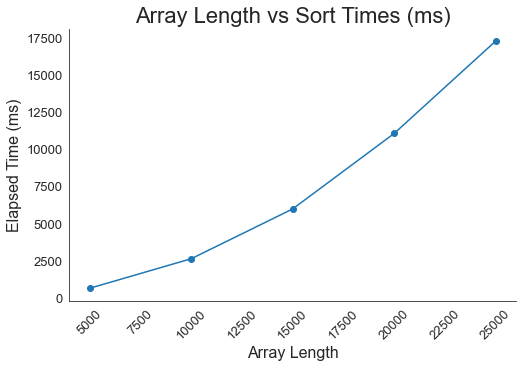

In [11]:
ax = results.plot.line(x='Array Length', figsize=(8,5), fontsize=13, marker='o', legend=False)
ax.set_title('Array Length vs Sort Times (ms)',fontsize= 22)
ax.set_xlabel('Array Length',fontsize=16)
plt.xticks(rotation=45)
ax.set_ylabel('Elapsed Time (ms)',fontsize=16)
#ax.set_xticks([512, 1024, 2048, 4096, 8192]) #This looks very distorted on the graph
sns.despine()
plt.show()

<h1>Summary</h1>

<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
          This selection sort works by finding the minimum value with a simple linear search then adding that value to storage in the first element.  Next, it finds the second smallest value with another simple linear search, and adds that value to storage in the second element. The algorightm repeats this processes until all values in the array have been "found" and added to storage in their appropriate element location, which is in order of least to greatest in this case.</p>

<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
    Each element requires a simple search, which takes <span style="color: red;"><b> O(n) </b></span> time.  This search will run <span style="color: red;"><b>n </b></span> times until everything is sorted.  Therefore, the maximum time a selection sort might take would be <span style="color: red;"><b> (O(n) * n) </b></span> time or <em style="color: red;"><b>O(n)<sup>2 </sup> </b></em>time. </p>
    
<p style="font-size:18px;color:#57595D; font-weight:normal; font-style:normal;font-family: 'Verdana'">
    The importance of sorting data is neverending, including sorting with selection sort. It can help organize data for presentations, like ranking which business items sold the most or least, or ranking which departments had more or less employee turnover.  It can also help us to reduce future data access or search time, because it's easier for both humans and computers to know where something is if it resides within a pattern of some kind. For example, if numbers are shown in ascending order, we know we won't see 10 after 100 is presented.</p>